# 1. Run DAD w/ factor analysis for dimensionality reduction

https://github.com/KordingLab/DAD
https://www.nature.com/articles/s41551-017-0169-7.epdf?shared_access_token=7c2-7kbFC10nGjJvSTRDxdRgN0jAjWel9jnR3ZoTv0OrTA5Ly_zvKyiC7NpnJM0SAuXemcwHYDzSxkymTFiWq1eEIUKQ1Q1kH9SCXJYRF_HpeKylywJY2t8O9cZpxtzavVFMFUosvsv-9W3tmJ7HYTf5GMNfZekxMvNEQdilnrE%3D
https://www.biorxiv.org/content/early/2017/06/20/152884.full.pdf+html

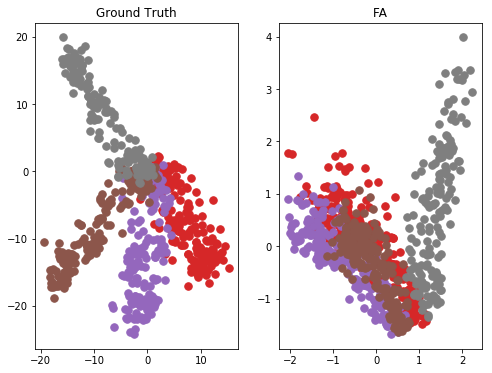

Finished computing the low-d embedding in 0.01 minutes.


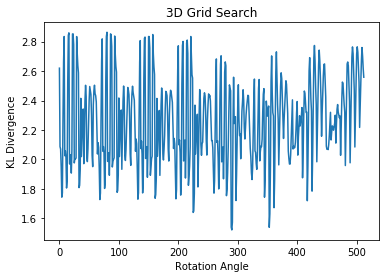

Finished performing 3D alignment in 8.37 minutes.


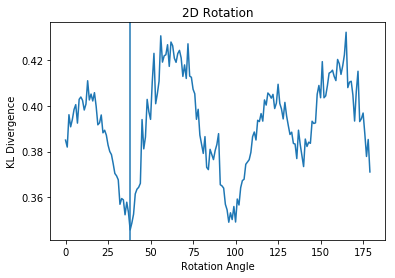

Finished performing the final 2D rotation in 0.06 minutes.


In [1]:
from decoder import utils, main

%matplotlib inline
#%matplotlib notebook
T_test, T_train, X_test, X_train, Y_test, Y_train = utils.load_data('data\mihi_demo.mat')

X_rec = main.run_DAD_3D(X_train, Y_test, T_train, X_test, T_test, grid_size=8, dim_red_method='FA')

#set options:
#number of angles to search over, dimensionality reduction method
#run 3D DAD
#compute R2
r2_dad = utils.eval_R2(X_rec, X_test)

### Compare with the Oracle linear decoder

In [2]:
from decoder import supervised

#run oracle
#compute R2
X_or = supervised.LS_oracle(X_test, Y_test)
r2_or = utils.eval_R2(X_or, X_test)

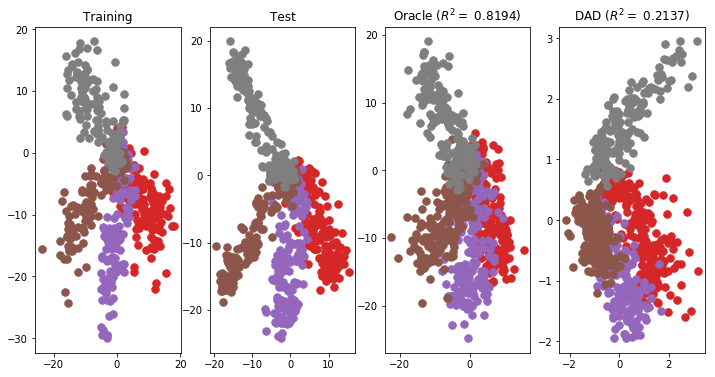

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.title('Training')
utils.color_data(X_train, T_train)
plt.subplot(1, 4, 2)
plt.title('Test')
utils.color_data(X_test, T_test)
plt.subplot(1, 4, 3)
plt.title('Oracle ($R^2 = $ %.4f)' %r2_or)
utils.color_data(X_or, T_test)
plt.subplot(1, 4, 4)
plt.title('DAD ($R^2 = $ %.4f)' %r2_dad)
utils.color_data(X_rec, T_test)

plt.show()

<IPython.core.display.Javascript object>


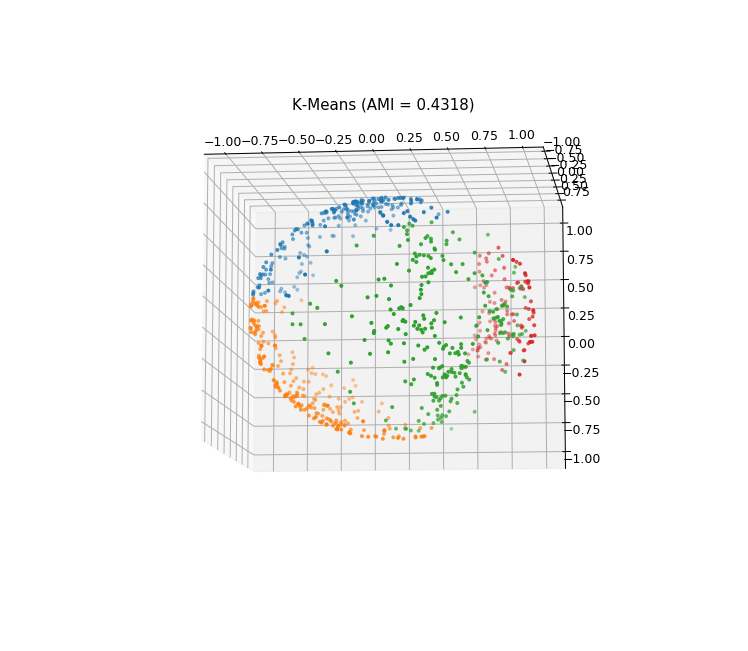

In [5]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
import numpy as np

%matplotlib notebook

fa = FactorAnalysis(n_components=3)
Y_fa = fa.fit_transform(main.remove_const_cols(Y_test))
Y_nfa = Y_fa / np.linalg.norm(Y_fa, axis=1)[:, np.newaxis]

kmeans = KMeans(n_clusters=4).fit(Y_nfa)
utils.color_data_3D(Y_nfa, kmeans.labels_.T)
plt.title('K-Means (AMI = %.4f)' %metrics.adjusted_mutual_info_score(T_test.flatten(), kmeans.labels_))
plt.show()

#utils.color_data_3D(Y_nfa, T_test)

<IPython.core.display.Javascript object>


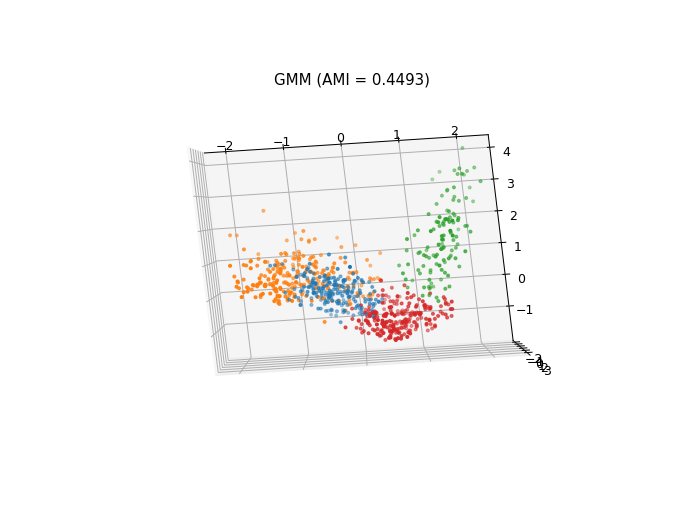

In [6]:
gmm = GaussianMixture(n_components=4, covariance_type='full').fit(Y_fa)
gmm_labels = gmm.predict(Y_fa)
utils.color_data_3D(Y_fa, gmm_labels.T)
plt.title('GMM (AMI = %.4f)' %metrics.adjusted_mutual_info_score(T_test.flatten(), gmm_labels))
plt.show()